
섹터 별로 수익률을 비교하고, 섹터 내부 종목별로 수익률은 어떻게 차이가 있는가?

필요한 데이터 : 섹터별 종목, 섹터별 지수(가격), 기간, 섹터 내부 종목 가격

In [1]:
!pip install finance-datareader


[notice] A new release of pip available: 22.2.2 -> 23.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [56]:
import pandas as pd
import numpy as np
import FinanceDataReader as fdr

sectors_csv = pd.read_csv('./섹터별_종목리스트.csv').drop(['Unnamed: 0'], axis = 1)
stock = fdr.DataReader('005930', '2018')  # 종목별 가격
 
# 한국거래소 상장종목 전체
df_krx = fdr.StockListing('KRX')[['Code', 'Name']]
sectors_csv

,2023 상반기 신규상장,SNS(소셜네트워크서비스),모바일솔루션(스마트폰),영상콘텐츠,창투사,K-뉴딜지수(2차전지),화폐/금융자동화기기(디지털화폐 등),메타버스(Metaverse),3D 낸드(NAND),2차전지(생산),...,건설기계,조선기자재,도시가스,항공/저가 항공사(LCC),면세점,원자력발전소 해체,LNG(액화천연가스),정유,애플페이,조선
0,스튜디오미르,유엔젤,유엔젤,스튜디오미르,린드먼아시아,SK아이이테크놀로지,케이씨티,비트나인,솔브레인홀딩스,LG화학,...,프리엠스,삼영엠텍,지에스이,티웨이항공,제이에스티나,휴림로봇,삼강엠앤티,SK이노베이션,나이스정보통신,HJ중공업
1,오브젠,인포뱅크,MDS테크,SM Life Design,플랜티넷,LG화학,로지시스,이노뎁,제우스,LG에너지솔루션,...,서연탑메탈,케이프,대성에너지,아시아나항공,신세계,에스앤더블류,POSCO홀딩스,GS,이루온,삼성중공업
2,한주라이트메탈,카카오,다날,SM C&C,미래에셋벤처투자,SKC,케이씨에스,엔피,심텍,삼성SDI,...,흥국,케이에스피,예스코홀딩스,진에어,호텔신라,비츠로테크,지역난방공사,S-Oil,한국정보통신,현대중공업
3,티이엠씨,아프리카TV,키네마스터,포바이포,TS인베스트먼트,솔루스첨단소재,한네트,에스넷,유진테크,SK이노베이션,...,혜인,삼강엠앤티,삼천리,대한항공,한국정보통신,두산에너빌리티,한국전력,NaN,NICE,한국조선해양
4,삼기이브이,가비아,폴라리스오피스,SBS,SV인베스트먼트,엘앤에프,프리엠스,코세스,원익IPS,NaN,...,디와이파워,상상인인더스트리,서울가스,AK홀딩스,토니모리,비에이치아이,대한해운,NaN,KG이니시스,대우조선해양
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
134,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
135,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
136,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# 1. 섹터 별로 수익률을 비교하는 함수 생성하기

- input : 섹터명
- output : 수익률

In [59]:
sectors_csv

,2023 상반기 신규상장,SNS(소셜네트워크서비스),모바일솔루션(스마트폰),영상콘텐츠,창투사,K-뉴딜지수(2차전지),화폐/금융자동화기기(디지털화폐 등),메타버스(Metaverse),3D 낸드(NAND),2차전지(생산),...,건설기계,조선기자재,도시가스,항공/저가 항공사(LCC),면세점,원자력발전소 해체,LNG(액화천연가스),정유,애플페이,조선
0,스튜디오미르,유엔젤,유엔젤,스튜디오미르,린드먼아시아,SK아이이테크놀로지,케이씨티,비트나인,솔브레인홀딩스,LG화학,...,프리엠스,삼영엠텍,지에스이,티웨이항공,제이에스티나,휴림로봇,삼강엠앤티,SK이노베이션,나이스정보통신,HJ중공업
1,오브젠,인포뱅크,MDS테크,SM Life Design,플랜티넷,LG화학,로지시스,이노뎁,제우스,LG에너지솔루션,...,서연탑메탈,케이프,대성에너지,아시아나항공,신세계,에스앤더블류,POSCO홀딩스,GS,이루온,삼성중공업
2,한주라이트메탈,카카오,다날,SM C&C,미래에셋벤처투자,SKC,케이씨에스,엔피,심텍,삼성SDI,...,흥국,케이에스피,예스코홀딩스,진에어,호텔신라,비츠로테크,지역난방공사,S-Oil,한국정보통신,현대중공업
3,티이엠씨,아프리카TV,키네마스터,포바이포,TS인베스트먼트,솔루스첨단소재,한네트,에스넷,유진테크,SK이노베이션,...,혜인,삼강엠앤티,삼천리,대한항공,한국정보통신,두산에너빌리티,한국전력,NaN,NICE,한국조선해양
4,삼기이브이,가비아,폴라리스오피스,SBS,SV인베스트먼트,엘앤에프,프리엠스,코세스,원익IPS,NaN,...,디와이파워,상상인인더스트리,서울가스,AK홀딩스,토니모리,비에이치아이,대한해운,NaN,KG이니시스,대우조선해양
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
134,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
135,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
136,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [40]:
def get_sector_ror(sector):
    return sector_ror

## 데이터 전처리

In [4]:
for i in sectors_csv.columns:
    print(i)

2023 상반기 신규상장
SNS(소셜네트워크서비스)
모바일솔루션(스마트폰)
영상콘텐츠
창투사
K-뉴딜지수(2차전지)
화폐/금융자동화기기(디지털화폐 등)
메타버스(Metaverse)
3D 낸드(NAND)
2차전지(생산)
SSD
아이폰
2차전지(전고체)
PCB(FPCB 등)
영화
반도체 대표주(생산)
폴더블폰
2021 상반기 신규상장
키오스크(KIOSK)
플렉서블 디스플레이
클라우드 컴퓨팅
반도체 재료/부품
음원/음반
NFT(대체불가토큰)
광고
폐배터리 관련주
2차전지(소재/부품)
인터넷 대표주
재택근무/스마트워크
2차전지
LCD장비
OLED(유기 발광 다이오드)
스마트카(SMART CAR)
갤럭시 부품주
모바일콘텐츠(스마트폰/태블릿PC)
K-뉴딜지수(인터넷)
2차전지(장비)
AI 챗봇(챗GPT 등)
지능형로봇/인공지능(AI)
증강현실(AR)
2차전지(LFP/리튬인산철)
마이데이터
NI(네트워크통합)
보안주(정보)
교육/온라인 교육
日 수출 규제(국산화 등)
카카오뱅크 관련주
반도체 장비
핀테크(FinTech)
출산장려정책
마이크로바이옴
마이크로 LED
엔터테인먼트
MLCC(적층세라믹콘덴서)
일자리(취업)
IT 대표주
비철금속
네옴시티 관련주
유전자 치료제/분석
재난/안전(지진 등)
보안주(물리)
음성인식
리튬 관련주
시스템반도체
인터넷은행
LED장비
LCD 부품/소재
가상현실(VR)
2021 하반기 신규상장
전자결제(전자화폐)
K-뉴딜지수
온실가스(탄소배출권)
코로나19(렘데시비르)
원숭이두창
페인트
U-Healthcare(원격진료)
2020 상반기 신규상장
K-뉴딜지수(바이오)
전기자전거
종합상사
두나무 관련주
슈퍼박테리아
쿠팡 관련주
전기차
탄소나노튜브(CNT)
전자파
여행
면역항암제
2020 하반기 신규상장
스마트팩토리(스마트공장)
코로나19(음압병실/음압구급차)
스마트폰
게임
태블릿PC
사물인터넷
4차산업 수혜주
태양광에너지
가상화폐(비트코인 등)
코로나19(스푸트니크V)
우주항공산업
스마트홈(홈네트워크)
백신여권
코로나19(진단키트)
전력저장장치(ESS

In [81]:
sector_name = '애플페이'
# 섹터별 종목리스트 / 특정 좀옥 가격/ 한국거래소 상장종목 전체

In [22]:
df_krx

,Code,Name
0,005930,삼성전자
1,373220,LG에너지솔루션
2,000660,SK하이닉스
3,207940,삼성바이오로직스
4,006400,삼성SDI
...,...,...
2694,308700,테크엔
2695,267810,앙츠
2696,215050,비엔디생활건강
2697,267060,명진홀딩스


In [53]:
sector_stock_list = sectors_csv['애플페이'].dropna().values
sector_stock_list  # 섹터 내부 종목별

array(['나이스정보통신', '이루온', '한국정보통신', 'NICE', 'KG이니시스', '하인크코리아', '셀피글로벌'],
      dtype=object)

In [11]:
sector_code_list = df_krx[df_krx['Name'].isin(sector_stock_list)]['Code']  # isin
sector_code_list

394     025770
401     034310
535     035600
693     036800
1124    373200
1803    065440
2061    068940
Name: Code, dtype: object

In [43]:
stock_price = fdr.DataReader('나이스정보통신', '2018')


'ascii' codec can't encode characters in position 25-31: ordinal not in range(128)  - symbol "나이스정보통신"not found or invalid periods


In [45]:
codes = df_krx.set_index('Code').to_dict()
codes

{'Name': {'005930': '삼성전자',
  '373220': 'LG에너지솔루션',
  '000660': 'SK하이닉스',
  '207940': '삼성바이오로직스',
  '006400': '삼성SDI',
  '051910': 'LG화학',
  '005935': '삼성전자우',
  '005380': '현대차',
  '035420': 'NAVER',
  '000270': '기아',
  '035720': '카카오',
  '005490': 'POSCO홀딩스',
  '068270': '셀트리온',
  '105560': 'KB금융',
  '028260': '삼성물산',
  '012330': '현대모비스',
  '055550': '신한지주',
  '066570': 'LG전자',
  '003670': '포스코케미칼',
  '096770': 'SK이노베이션',
  '034730': 'SK',
  '086790': '하나금융지주',
  '247540': '에코프로비엠',
  '032830': '삼성생명',
  '003550': 'LG',
  '323410': '카카오뱅크',
  '015760': '한국전력',
  '033780': 'KT&G',
  '051900': 'LG생활건강',
  '011200': 'HMM',
  '009150': '삼성전기',
  '010130': '고려아연',
  '017670': 'SK텔레콤',
  '034020': '두산에너빌리티',
  '018260': '삼성에스디에스',
  '329180': '현대중공업',
  '000810': '삼성화재',
  '010950': 'S-Oil',
  '091990': '셀트리온헬스케어',
  '036570': '엔씨소프트',
  '316140': '우리금융지주',
  '090430': '아모레퍼시픽',
  '066970': '엘앤에프',
  '009830': '한화솔루션',
  '030200': 'KT',
  '259960': '크래프톤',
  '003490': '대한항공',
  '352820': '하

In [48]:
result = pd.DataFrame()
for code in sector_code_list:
    stock_price = fdr.DataReader(code, '2018')[['Close']].rename(columns = {'Close':codes['Name'][code]}) # 특정 종목 가격
    result = pd.concat([result, stock_price], axis = 1)
stock_price

,셀피글로벌
Date,
2018-01-02,2395
2018-01-03,2420
2018-01-04,2510
2018-01-05,2625
2018-01-08,2605
...,...
2023-02-08,1646
2023-02-09,1616
2023-02-10,1595


In [38]:
result.head()
# 섹터 내무 종목별 -> result의 column이 되었다.

,한국정보통신,NICE,KG이니시스,나이스정보통신,하인크코리아,이루온,셀피글로벌
Date,,,,,,,
2018-01-02,11950,14300,18400,23100,NaN,2227,2395
2018-01-03,11900,14050,17850,22900,NaN,2194,2420
2018-01-04,11500,14150,16900,23050,NaN,2315,2510
2018-01-05,11350,14400,17000,23150,NaN,2315,2625
2018-01-08,10950,14300,18400,23050,NaN,2327,2605


## 섹터별로 

In [79]:
# 두괄식 (밑에거 실행후 위에거)
def get_sector_ror(sector):
    sector_stock_list = sectors_csv[sector].dropna().values
    rate_of_returns = result.pct_change()
    sector_list = []
    names = []
    for name in sector_stock_list:
        sector_list.append(((rate_of_returns[name] + 1).cumprod() - 1)[-1])
        names.append(name)
    sector_ror = np.mean(sector_list)
    print('섹터 내부 종목들:' , names)
    print('섹터 내부 종목별 수익률' , sector_list)
    return sector_ror

In [80]:
get_sector_ror('애플페이')

섹터 내부 종목들: ['나이스정보통신', '이루온', '한국정보통신', 'NICE', 'KG이니시스', '하인크코리아', '셀피글로벌']
섹터 내부 종목별 수익률 [0.2251082251082246, 0.29097440502919025, 0.2309623430962331, -0.018881118881125425, -0.27989130434782705, 2.9429928741092524, -0.35073068893528414]


0.4343621050255234

### 과정들(시행착오들)

In [ ]:
rate_of_returns['하인크코리아'].mean() 
# 너무 값이 작게나온다 왜지? 단순히 더해버리면 + - 도 다 해버리니 값이 작다 거기에 평균이니 더작을수밖에

In [60]:
sectors_csv.head()

,2023 상반기 신규상장,SNS(소셜네트워크서비스),모바일솔루션(스마트폰),영상콘텐츠,창투사,K-뉴딜지수(2차전지),화폐/금융자동화기기(디지털화폐 등),메타버스(Metaverse),3D 낸드(NAND),2차전지(생산),...,건설기계,조선기자재,도시가스,항공/저가 항공사(LCC),면세점,원자력발전소 해체,LNG(액화천연가스),정유,애플페이,조선
0,스튜디오미르,유엔젤,유엔젤,스튜디오미르,린드먼아시아,SK아이이테크놀로지,케이씨티,비트나인,솔브레인홀딩스,LG화학,...,프리엠스,삼영엠텍,지에스이,티웨이항공,제이에스티나,휴림로봇,삼강엠앤티,SK이노베이션,나이스정보통신,HJ중공업
1,오브젠,인포뱅크,MDS테크,SM Life Design,플랜티넷,LG화학,로지시스,이노뎁,제우스,LG에너지솔루션,...,서연탑메탈,케이프,대성에너지,아시아나항공,신세계,에스앤더블류,POSCO홀딩스,GS,이루온,삼성중공업
2,한주라이트메탈,카카오,다날,SM C&C,미래에셋벤처투자,SKC,케이씨에스,엔피,심텍,삼성SDI,...,흥국,케이에스피,예스코홀딩스,진에어,호텔신라,비츠로테크,지역난방공사,S-Oil,한국정보통신,현대중공업
3,티이엠씨,아프리카TV,키네마스터,포바이포,TS인베스트먼트,솔루스첨단소재,한네트,에스넷,유진테크,SK이노베이션,...,혜인,삼강엠앤티,삼천리,대한항공,한국정보통신,두산에너빌리티,한국전력,NaN,NICE,한국조선해양
4,삼기이브이,가비아,폴라리스오피스,SBS,SV인베스트먼트,엘앤에프,프리엠스,코세스,원익IPS,NaN,...,디와이파워,상상인인더스트리,서울가스,AK홀딩스,토니모리,비에이치아이,대한해운,NaN,KG이니시스,대우조선해양


In [62]:
sector_stock_list = sectors_csv['애플페이']
sector_stock_list


0      나이스정보통신
1          이루온
2       한국정보통신
3         NICE
4       KG이니시스
        ...   
133        NaN
134        NaN
135        NaN
136        NaN
137        NaN
Name: 애플페이, Length: 138, dtype: object

In [63]:
sector_code_list = df_krx[df_krx['Name'].isin(sector_stock_list)]['Code']  # isin
sector_code_list

394     025770
401     034310
535     035600
693     036800
1124    373200
1803    065440
2061    068940
Name: Code, dtype: object

In [66]:
rate_of_returns = result.pct_change()
rate_of_returns.head()

,한국정보통신,NICE,KG이니시스,나이스정보통신,하인크코리아,이루온,셀피글로벌
Date,,,,,,,
2018-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-03,-0.004184,-0.017483,-0.029891,-0.008658,NaN,-0.014818,0.010438
2018-01-04,-0.033613,0.007117,-0.053221,0.006550,NaN,0.055150,0.037190
2018-01-05,-0.013043,0.017668,0.005917,0.004338,NaN,0.000000,0.045817
2018-01-08,-0.035242,-0.006944,0.082353,-0.004320,NaN,0.005184,-0.007619


In [82]:
%pwd

'C:\\Users\\업무용\\jupyter_python\\금융데이터분석'

In [69]:
rate_of_returns['한국정보통신'].sum()

0.815266551804607

In [73]:
한국정보통신_누적수익률 = (rate_of_returns['한국정보통신'] + 1).cumprod() - 1
한국정보통신_누적수익률[-1]

0.2309623430962331

In [78]:
# 자습시간에 할 숙제!

# 2. 섹터 내부 종목별로 수익률을 확인

## 데이터 전처리

In [4]:
for i in sectors_csv.columns:
    print(i)

2023 상반기 신규상장
SNS(소셜네트워크서비스)
모바일솔루션(스마트폰)
영상콘텐츠
창투사
K-뉴딜지수(2차전지)
화폐/금융자동화기기(디지털화폐 등)
메타버스(Metaverse)
3D 낸드(NAND)
2차전지(생산)
SSD
아이폰
2차전지(전고체)
PCB(FPCB 등)
영화
반도체 대표주(생산)
폴더블폰
2021 상반기 신규상장
키오스크(KIOSK)
플렉서블 디스플레이
클라우드 컴퓨팅
반도체 재료/부품
음원/음반
NFT(대체불가토큰)
광고
폐배터리 관련주
2차전지(소재/부품)
인터넷 대표주
재택근무/스마트워크
2차전지
LCD장비
OLED(유기 발광 다이오드)
스마트카(SMART CAR)
갤럭시 부품주
모바일콘텐츠(스마트폰/태블릿PC)
K-뉴딜지수(인터넷)
2차전지(장비)
AI 챗봇(챗GPT 등)
지능형로봇/인공지능(AI)
증강현실(AR)
2차전지(LFP/리튬인산철)
마이데이터
NI(네트워크통합)
보안주(정보)
교육/온라인 교육
日 수출 규제(국산화 등)
카카오뱅크 관련주
반도체 장비
핀테크(FinTech)
출산장려정책
마이크로바이옴
마이크로 LED
엔터테인먼트
MLCC(적층세라믹콘덴서)
일자리(취업)
IT 대표주
비철금속
네옴시티 관련주
유전자 치료제/분석
재난/안전(지진 등)
보안주(물리)
음성인식
리튬 관련주
시스템반도체
인터넷은행
LED장비
LCD 부품/소재
가상현실(VR)
2021 하반기 신규상장
전자결제(전자화폐)
K-뉴딜지수
온실가스(탄소배출권)
코로나19(렘데시비르)
원숭이두창
페인트
U-Healthcare(원격진료)
2020 상반기 신규상장
K-뉴딜지수(바이오)
전기자전거
종합상사
두나무 관련주
슈퍼박테리아
쿠팡 관련주
전기차
탄소나노튜브(CNT)
전자파
여행
면역항암제
2020 하반기 신규상장
스마트팩토리(스마트공장)
코로나19(음압병실/음압구급차)
스마트폰
게임
태블릿PC
사물인터넷
4차산업 수혜주
태양광에너지
가상화폐(비트코인 등)
코로나19(스푸트니크V)
우주항공산업
스마트홈(홈네트워크)
백신여권
코로나19(진단키트)
전력저장장치(ESS

In [5]:
sector_name = '애플페이'

# 섹터별 종목리스트 / 특정 좀옥 가격/ 한국거래소 상장종목 전체

In [22]:
df_krx

,Code,Name
0,005930,삼성전자
1,373220,LG에너지솔루션
2,000660,SK하이닉스
3,207940,삼성바이오로직스
4,006400,삼성SDI
...,...,...
2694,308700,테크엔
2695,267810,앙츠
2696,215050,비엔디생활건강
2697,267060,명진홀딩스


In [53]:
sector_stock_list = sectors_csv['애플페이'].dropna().values
sector_stock_list  # 섹터 내부 종목별

array(['나이스정보통신', '이루온', '한국정보통신', 'NICE', 'KG이니시스', '하인크코리아', '셀피글로벌'],
      dtype=object)

In [11]:
sector_code_list = df_krx[df_krx['Name'].isin(sector_stock_list)]['Code']  # isin
sector_code_list

394     025770
401     034310
535     035600
693     036800
1124    373200
1803    065440
2061    068940
Name: Code, dtype: object

In [43]:
stock_price = fdr.DataReader('나이스정보통신', '2018')


'ascii' codec can't encode characters in position 25-31: ordinal not in range(128)  - symbol "나이스정보통신"not found or invalid periods


In [45]:
codes = df_krx.set_index('Code').to_dict()
codes

{'Name': {'005930': '삼성전자',
  '373220': 'LG에너지솔루션',
  '000660': 'SK하이닉스',
  '207940': '삼성바이오로직스',
  '006400': '삼성SDI',
  '051910': 'LG화학',
  '005935': '삼성전자우',
  '005380': '현대차',
  '035420': 'NAVER',
  '000270': '기아',
  '035720': '카카오',
  '005490': 'POSCO홀딩스',
  '068270': '셀트리온',
  '105560': 'KB금융',
  '028260': '삼성물산',
  '012330': '현대모비스',
  '055550': '신한지주',
  '066570': 'LG전자',
  '003670': '포스코케미칼',
  '096770': 'SK이노베이션',
  '034730': 'SK',
  '086790': '하나금융지주',
  '247540': '에코프로비엠',
  '032830': '삼성생명',
  '003550': 'LG',
  '323410': '카카오뱅크',
  '015760': '한국전력',
  '033780': 'KT&G',
  '051900': 'LG생활건강',
  '011200': 'HMM',
  '009150': '삼성전기',
  '010130': '고려아연',
  '017670': 'SK텔레콤',
  '034020': '두산에너빌리티',
  '018260': '삼성에스디에스',
  '329180': '현대중공업',
  '000810': '삼성화재',
  '010950': 'S-Oil',
  '091990': '셀트리온헬스케어',
  '036570': '엔씨소프트',
  '316140': '우리금융지주',
  '090430': '아모레퍼시픽',
  '066970': '엘앤에프',
  '009830': '한화솔루션',
  '030200': 'KT',
  '259960': '크래프톤',
  '003490': '대한항공',
  '352820': '하

In [48]:
result = pd.DataFrame()
for code in sector_code_list:
    stock_price = fdr.DataReader(code, '2018')[['Close']].rename(columns = {'Close':codes['Name'][code]}) # 특정 종목 가격
    result = pd.concat([result, stock_price], axis = 1)
stock_price

,셀피글로벌
Date,
2018-01-02,2395
2018-01-03,2420
2018-01-04,2510
2018-01-05,2625
2018-01-08,2605
...,...
2023-02-08,1646
2023-02-09,1616
2023-02-10,1595


In [38]:
result.head()
# 섹터 내무 종목별 -> result의 column이 되었다.

,한국정보통신,NICE,KG이니시스,나이스정보통신,하인크코리아,이루온,셀피글로벌
Date,,,,,,,
2018-01-02,11950,14300,18400,23100,NaN,2227,2395
2018-01-03,11900,14050,17850,22900,NaN,2194,2420
2018-01-04,11500,14150,16900,23050,NaN,2315,2510
2018-01-05,11350,14400,17000,23150,NaN,2315,2625
2018-01-08,10950,14300,18400,23050,NaN,2327,2605


In [31]:
result.isnull().sum()  # null 값이 몇개씩 있는지

한국정보통신       0
NICE         0
KG이니시스       0
나이스정보통신      0
하인크코리아     775
이루온          0
셀피글로벌        0
dtype: int64

## 수익률

In [49]:
rate_of_returns = result.pct_change()
rate_of_returns.tail()

,한국정보통신,NICE,KG이니시스,나이스정보통신,하인크코리아,이루온,셀피글로벌
Date,,,,,,,
2023-02-08,0.016595,0.014085,0.025945,0.018116,0.144068,0.014469,0.073012
2023-02-09,-0.033253,-0.022917,0.000000,0.017794,-0.012698,0.004754,-0.018226
2023-02-10,-0.048155,0.007107,-0.031069,-0.029720,-0.094319,-0.058360,-0.012995
2023-02-13,-0.007884,-0.016937,0.011186,0.021622,0.001183,0.005025,-0.016301
2023-02-14,-0.025828,0.007179,-0.022861,-0.001764,-0.018913,-0.041667,-0.008923


<AxesSubplot: xlabel='Date'>

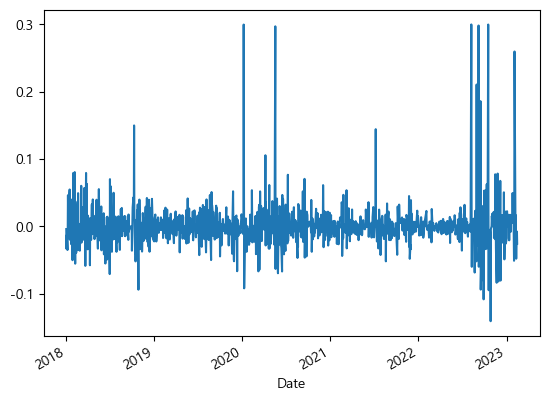

In [52]:
rate_of_returns['한국정보통신'].plot()

In [17]:
# 런타임 다시 시작
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm  
plt.rc('font', family='Malgun Gothic') 
plt.rcParams['axes.unicode_minus'] = False #한글 폰트 사용시 마이너스 폰트 깨짐 해결

## 누적수익률

In [19]:
cum_ror = (rate_of_returns + 1).cumprod() - 1
cum_ror.tail()

,한국정보통신,NICE,KG이니시스,나이스정보통신,하인크코리아,이루온,셀피글로벌
Date,,,,,,,
2023-02-08,0.384100,0.006993,-0.247826,0.216450,3.489311,0.416704,-0.312735
2023-02-09,0.338075,-0.016084,-0.247826,0.238095,3.432304,0.423440,-0.325261
2023-02-10,0.273640,-0.009091,-0.271196,0.201299,3.014252,0.340368,-0.334029
2023-02-13,0.263598,-0.025874,-0.263043,0.227273,3.019002,0.347104,-0.344885
2023-02-14,0.230962,-0.018881,-0.279891,0.225108,2.942993,0.290974,-0.350731


<AxesSubplot: xlabel='Date'>

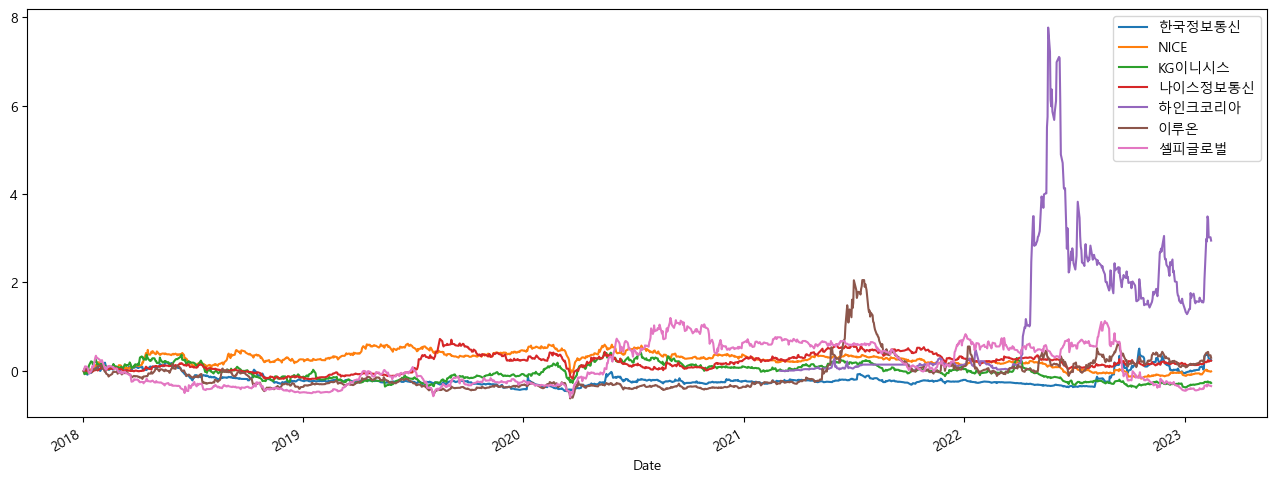

In [20]:
cum_ror.plot(figsize =  (16, 6))

## 오늘부터 5/ 10 ... 240/ 일전부터 현재까지의 수익률

In [47]:
rate_of_returns.tail()

,한국정보통신,NICE,KG이니시스,나이스정보통신,하인크코리아,이루온,셀피글로벌
Date,,,,,,,
2023-02-08,0.016595,0.014085,0.025945,0.018116,0.144068,0.014469,0.073012
2023-02-09,-0.033253,-0.022917,0.000000,0.017794,-0.012698,0.004754,-0.018226
2023-02-10,-0.048155,0.007107,-0.031069,-0.029720,-0.094319,-0.058360,-0.012995
2023-02-13,-0.007884,-0.016937,0.011186,0.021622,0.001183,0.005025,-0.016301
2023-02-14,-0.024503,0.000718,-0.016224,-0.005291,-0.017730,-0.031667,-0.002549


In [21]:
from datetime import datetime, timedelta

ref_day = datetime(2023, 2, 14)
ref_day - timedelta(1)

datetime.datetime(2023, 2, 13, 0, 0)

In [ ]:
# datetime = 특정시점
# timedelta = 계산식에 이용

In [25]:
# 5일, 10일
timedeltas = [5, 10, 20, 60, 120, 240]
result = pd.DataFrame()
for day in timedeltas:
    start_day = ref_day - timedelta(day)
    end_day = ref_day
    subset_ror = rate_of_returns[start_day:end_day]
    cum_ror_df = (subset_ror + 1).cumprod() - 1    # 누적수익률
    cum_ror = cum_ror_df.iloc[-1]
    cum_ror.name = day
    result = pd.concat([result, cum_ror], axis = 1)
result

,5,10,20,60,120,240
한국정보통신,-0.110641,-0.067216,0.215702,0.210700,0.101873,0.915365
NICE,-0.025694,-0.014055,0.050936,0.031618,0.145306,0.016667
KG이니시스,-0.042630,-0.030015,0.047431,0.015326,0.132479,-0.039855
나이스정보통신,0.007117,0.019820,0.088462,0.050093,0.061914,0.107632
하인크코리아,-0.121693,0.286822,0.534196,0.255673,0.534196,-0.231481
이루온,-0.088748,-0.031987,0.118677,0.056985,0.150000,0.076779
셀피글로벌,-0.055286,-0.012698,0.178030,-0.085294,-0.233990,-0.610763


In [31]:
result # 주가 Close

,5,10,20,60,120,240
한국정보통신,-0.110641,-0.067216,0.215702,0.210700,0.101873,0.915365
NICE,-0.025694,-0.014055,0.050936,0.031618,0.145306,0.016667
KG이니시스,-0.042630,-0.030015,0.047431,0.015326,0.132479,-0.039855
나이스정보통신,0.007117,0.019820,0.088462,0.050093,0.061914,0.107632
하인크코리아,-0.121693,0.286822,0.534196,0.255673,0.534196,-0.231481
이루온,-0.088748,-0.031987,0.118677,0.056985,0.150000,0.076779
셀피글로벌,-0.055286,-0.012698,0.178030,-0.085294,-0.233990,-0.610763


In [33]:
rate_of_returns[start_day : end_day].head()  # 수익률

,한국정보통신,NICE,KG이니시스,나이스정보통신,하인크코리아,이루온,셀피글로벌
Date,,,,,,,
2022-06-20,-0.023438,-0.025362,-0.021739,-0.035225,-0.267593,-0.089888,0.003755
2022-06-21,0.020000,-0.022305,0.011111,-0.010142,0.123894,-0.039095,0.011222
2022-06-22,-0.016993,-0.015209,-0.025641,-0.018443,-0.096738,-0.081370,-0.012330
2022-06-23,-0.007979,-0.015444,-0.037594,-0.002088,-0.155666,-0.086247,0.023720
2022-06-24,0.028150,0.066667,0.066406,0.014644,0.011799,0.043367,-0.171951


In [32]:
# startday 가 없는 날짜이면 그날짜는 빼고 다음 영업일을 보여준다

In [72]:
result.style.background_gradient(cmap='coolwarm')

,5,10,20,60,120,240
한국정보통신,-0.109432,-0.065948,0.217355,0.212346,0.103371,0.917969
NICE,-0.031944,-0.020379,0.044195,0.025000,0.137959,0.010145
KG이니시스,-0.036127,-0.023426,0.054545,0.022222,0.140171,-0.033333
나이스정보통신,0.003559,0.016216,0.084615,0.046382,0.058161,0.103718
하인크코리아,-0.120635,0.288372,0.536044,0.257186,0.536044,-0.230556
이루온,-0.079239,-0.021886,0.130350,0.068015,0.162000,0.088015
셀피글로벌,-0.049210,-0.006349,0.185606,-0.079412,-0.229064,-0.608260


In [76]:
result.mean()  # 해당 기간 수익률

5     -0.060433
10     0.023800
20     0.178959
60     0.078820
120    0.129806
240    0.035385
dtype: float64

In [75]:
result.mean(axis = 1) # 종목의 평균수익률

한국정보통신     0.212610
NICE       0.027496
KG이니시스     0.020675
나이스정보통신    0.052109
하인크코리아     0.211076
이루온        0.057876
셀피글로벌     -0.131115
dtype: float64